<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### For the "Median value of owner-occupied homes" provide a boxplot

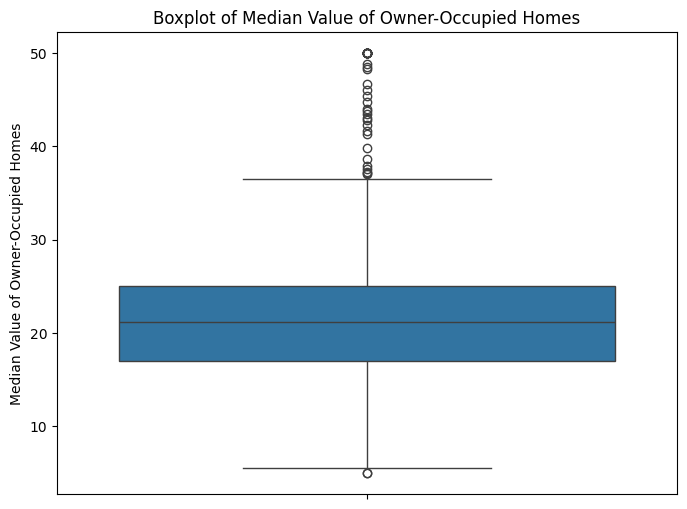

In [11]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.show()


#### Provide a  bar plot for the Charles river variable

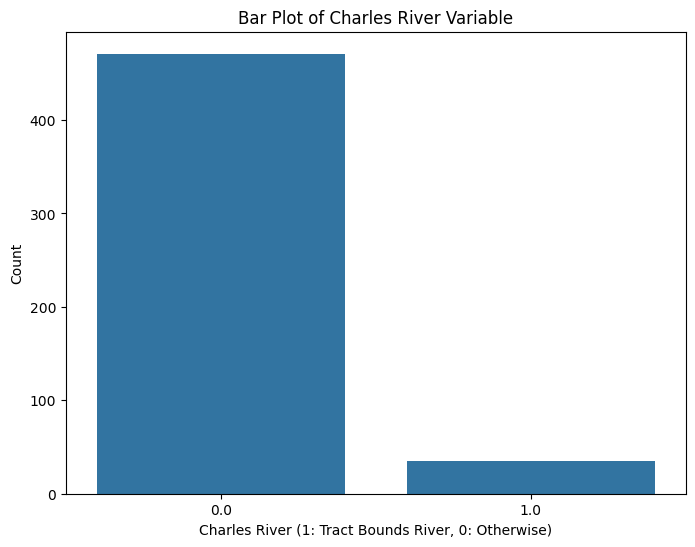

In [12]:
pyplot.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (1: Tract Bounds River, 0: Otherwise)')
pyplot.ylabel('Count')
pyplot.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [14]:
import numpy as np

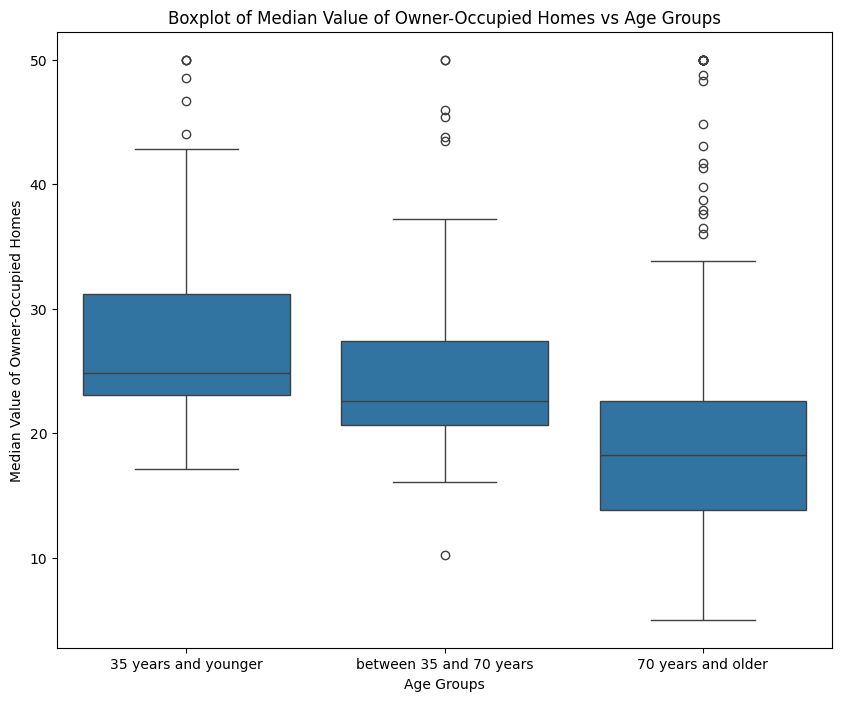

In [16]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

pyplot.figure(figsize=(10, 8))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes vs Age Groups')
pyplot.xlabel('Age Groups')
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.show()


#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

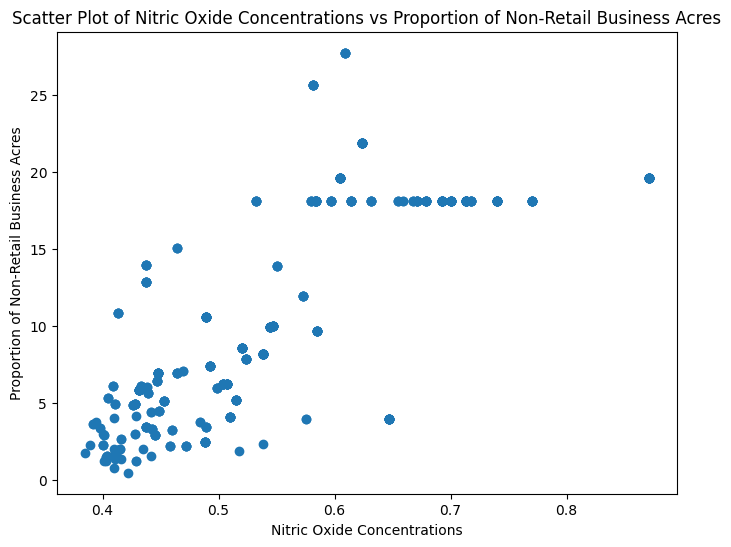

In [17]:
pyplot.figure(figsize=(8, 6))
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentrations')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
pyplot.show()

#### Create a histogram for the pupil to teacher ratio variable

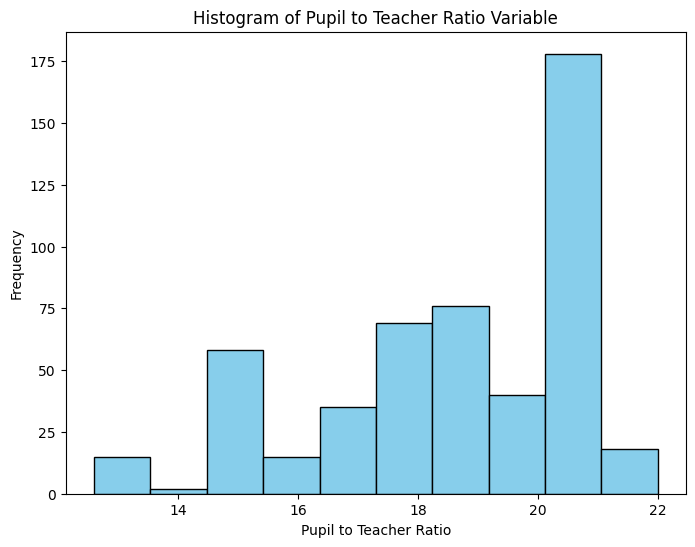

In [18]:
pyplot.figure(figsize=(8, 6))
pyplot.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')
pyplot.title('Histogram of Pupil to Teacher Ratio Variable')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [23]:
from scipy import stats
# Perform T-test
t_statistic, p_value = stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


###### Conclusion:

- Based on the T-test results, if the p-value is less than 0.05, we reject the null hypothesis and conclude that    there is a significant difference in the median value of houses bounded by the Charles river.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [24]:
# Perform ANOVA
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Check significance
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


#### Conclusion:

- If the p-value from the ANOVA test is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [25]:
# Calculate Pearson correlation
correlation = boston_df['NOX'].corr(boston_df['INDUS'])

# Check significance
alpha = 0.05
if abs(correlation) < alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


##### Conclusion:

- If the absolute value of the Pearson correlation coefficient is less than 0.05, we fail to reject the null hypothesis and conclude that there is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [26]:
# Perform regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Check significance
alpha = 0.05
if model.pvalues[1] < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
    

Reject the null hypothesis


#### Conclusion:

- If the p-value for the coefficient of the weighted distance variable is less than 0.05, we reject the null hypothesis and conclude that there is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
